This notebook contains the code for the EDA. 

In [ ]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Distribution of Unemployment Rate

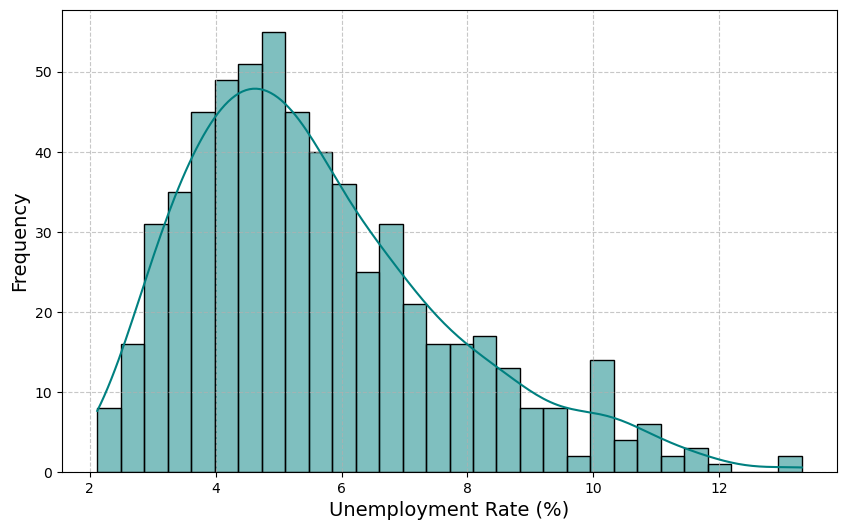

In [16]:
#loading the dataset
dataset = pd.read_csv('/Users/bhargavsrisainama/Documents/personal/CU Boulder Data Science/STAT/Project/Cleaned/Final Cleaned/final_sampled_dataset.csv')

plt.figure(figsize=(10, 6))
sns.histplot(dataset['Unemployment Rate'], bins=30, kde=True, color='teal')
plt.xlabel('Unemployment Rate (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Scatter Plot between Violent and Property Crime

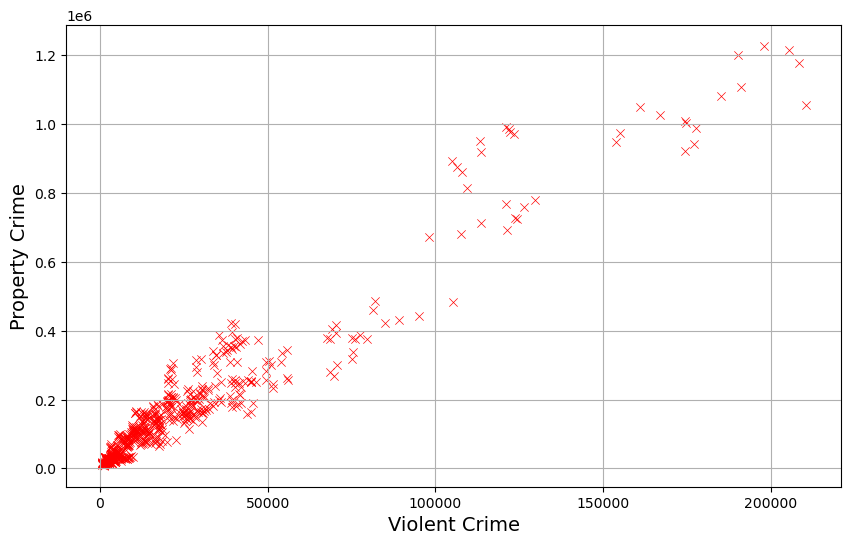

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Violent Crime', y='Property Crime', data=dataset, marker='x', color='red')
plt.xlabel('Violent Crime', fontsize=14)
plt.ylabel('Property Crime', fontsize=14)


plt.grid(True)
plt.show()

Average Violent and Property Crime by Labor Force Size Range

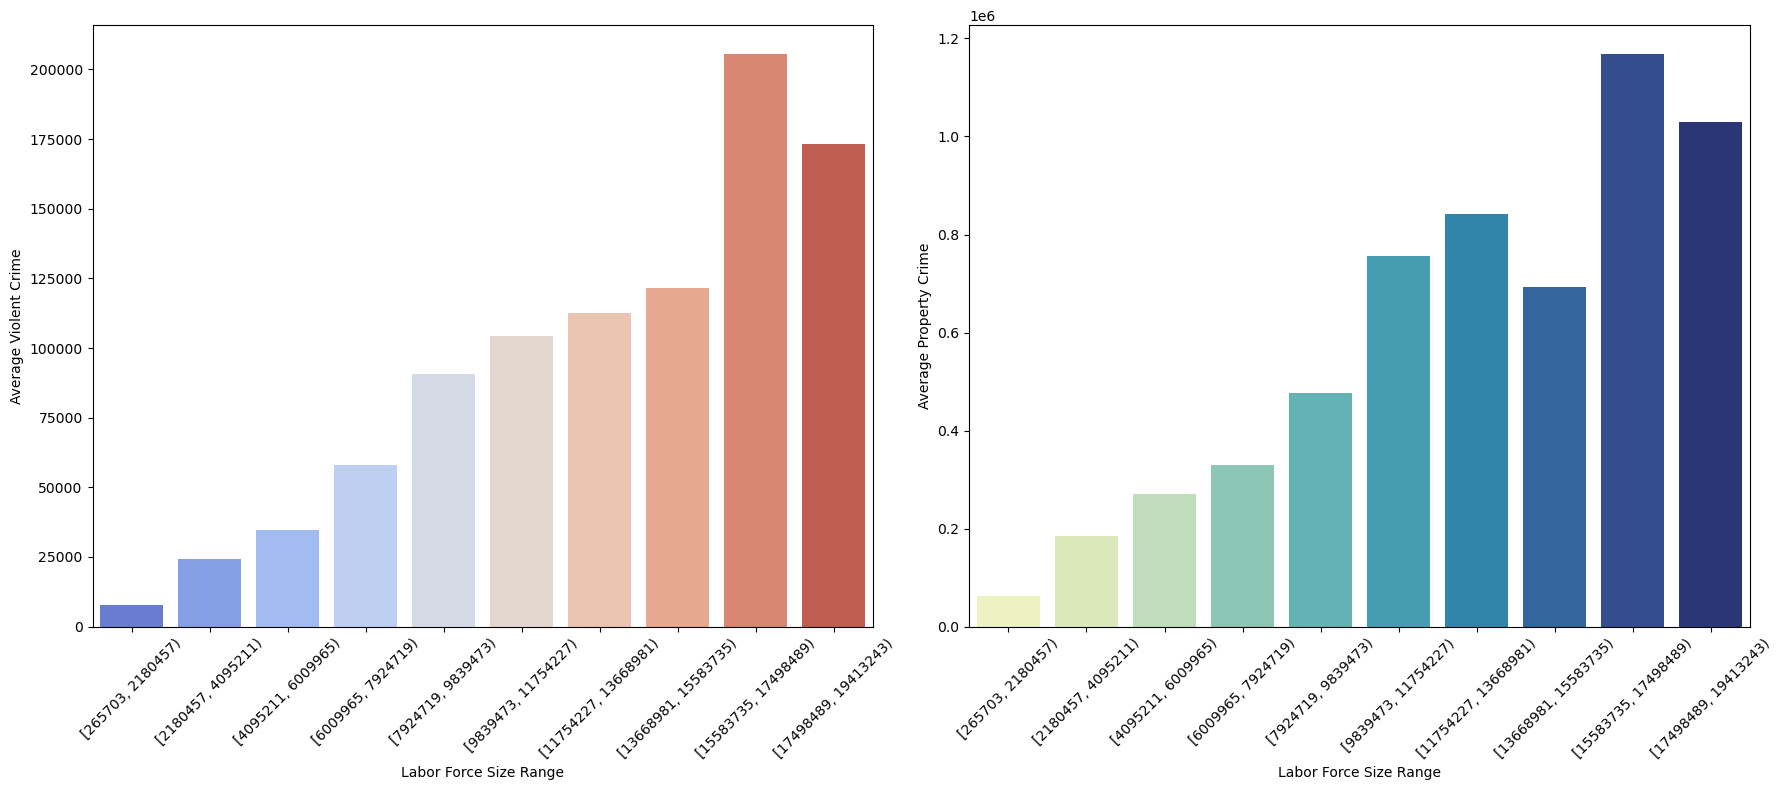

In [18]:
min_labor_force = dataset['Labor Force'].min()
max_labor_force = dataset['Labor Force'].max()
labor_force_bins = range(int(min_labor_force), int(max_labor_force) + 1, (int(max_labor_force) - int(min_labor_force)) // 10)
dataset['Labor Force Range'] = pd.cut(dataset['Labor Force'], bins=labor_force_bins, right=False)

avg_violent_crime_by_labor = dataset.groupby('Labor Force Range')['Violent Crime'].mean().reset_index()
avg_property_crime_by_labor = dataset.groupby('Labor Force Range')['Property Crime'].mean().reset_index()
avg_violent_crime_by_labor['Labor Force Range'] = avg_violent_crime_by_labor['Labor Force Range'].astype(str)
avg_property_crime_by_labor['Labor Force Range'] = avg_property_crime_by_labor['Labor Force Range'].astype(str)



fig, axes = plt.subplots(1, 2, figsize=(18, 8))
palette_violent = sns.color_palette("coolwarm", len(avg_violent_crime_by_labor))
palette_property = sns.color_palette("YlGnBu", len(avg_property_crime_by_labor))

# Plot 1: Labor Force Range vs. Violent Crime
sns.barplot(x='Labor Force Range', y='Violent Crime', data=avg_violent_crime_by_labor, ax=axes[0], palette=palette_violent)
axes[0].set_xlabel('Labor Force Size Range')
axes[0].set_ylabel('Average Violent Crime')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Labor Force Range vs. Property Crime
sns.barplot(x='Labor Force Range', y='Property Crime', data=avg_property_crime_by_labor, ax=axes[1], palette=palette_property)
axes[1].set_xlabel('Labor Force Size Range')
axes[1].set_ylabel('Average Property Crime')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

Normalized Distribution of Various Crime Types

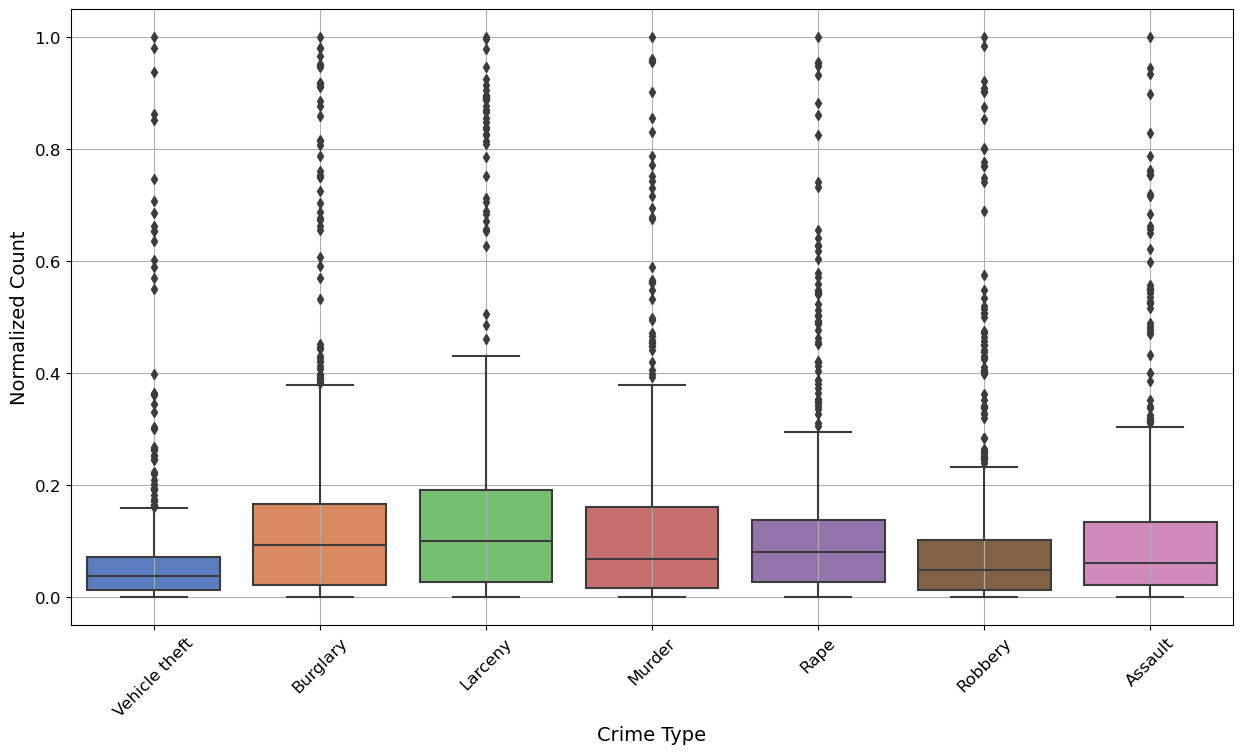

In [19]:
from sklearn.preprocessing import MinMaxScaler
crime_type_columns = ['Vehicle theft','Burglary', 'Larceny', 'Murder', 'Rape', 'Robbery', 'Assault']  # Modify as needed

if not all(col in dataset.columns for col in crime_type_columns):
    raise ValueError("Some crime type columns are not present in the dataset.")

crime_types_for_boxplot = dataset[crime_type_columns]
scaler = MinMaxScaler()
crime_types_normalized = scaler.fit_transform(crime_types_for_boxplot)


normalized_crime_data = pd.DataFrame(crime_types_normalized, columns=crime_type_columns)
normalized_long_format_data = pd.melt(normalized_crime_data, var_name='Crime Type', value_name='Normalized Count')

# Plotting the boxplot with the 'muted' color palette
plt.figure(figsize=(15, 8))
sns.boxplot(x='Crime Type', y='Normalized Count', data=normalized_long_format_data, palette="muted")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Normalized Count', fontsize=14)
plt.xlabel('Crime Type', fontsize=14)
plt.grid(True)
plt.show()

Joint Plot of Unemployment Rate vs. Total Crime

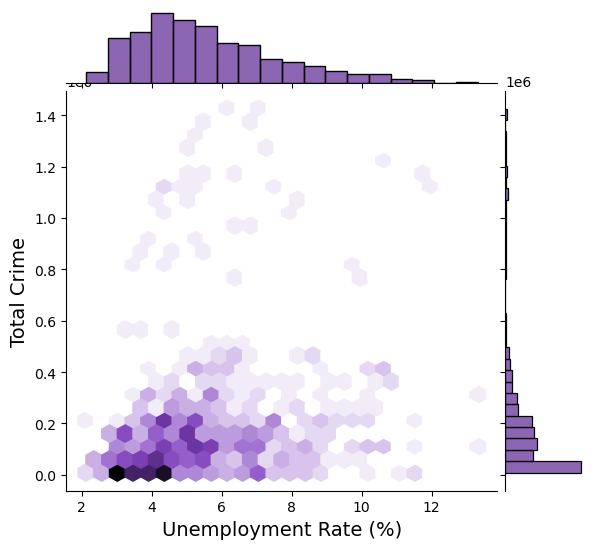

In [20]:
dataset['Total Crime'] = dataset['Violent Crime'] + dataset['Property Crime']
joint_plot = sns.jointplot(x='Unemployment Rate', y='Total Crime', data=dataset, kind='hex', color='rebeccapurple', space=0.1)
joint_plot.set_axis_labels('Unemployment Rate (%)', 'Total Crime', fontsize=14)

joint_plot.fig.subplots_adjust(top=0.9)
plt.show()

Pair Plot Analysis of Labor Force, Unemployment Rate, and Violent Crime

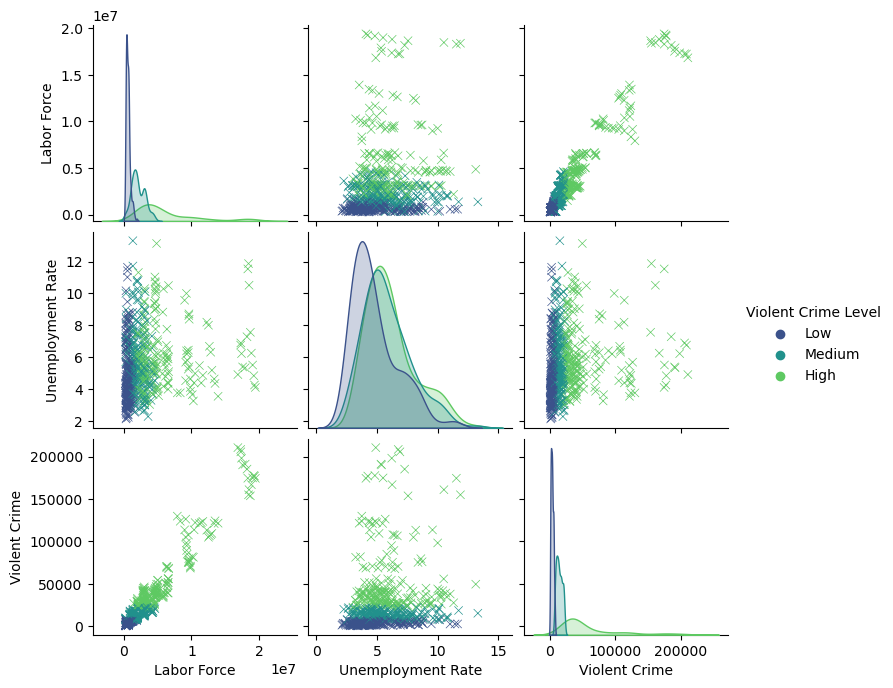

In [22]:
dataset['Violent Crime Level'] = pd.qcut(dataset['Violent Crime'], 3, labels=["Low", "Medium", "High"])
pair_plot_data = dataset[['Labor Force', 'Unemployment Rate', 'Violent Crime', 'Violent Crime Level']]
pair_plot = sns.pairplot(pair_plot_data, hue='Violent Crime Level', palette='viridis', markers='x')
pair_plot.fig.subplots_adjust(top=0.89)
plt.show()